# **IMPORTS**

---

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
import os

In [86]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import sklearn

In [87]:
import sklearn, pandas, numpy, matplotlib, seaborn, xgboost

print(f"Scikit-learn: {sklearn.__version__}")
print(f"Pandas: {pandas.__version__}")
print(f"Numpy: {numpy.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")
print(f"Seaborn: {seaborn.__version__}")
print(f"XGBoost: {xgboost.__version__}")

Scikit-learn: 1.5.1
Pandas: 2.2.2
Numpy: 1.26.4
Matplotlib: 3.9.2
Seaborn: 0.13.2
XGBoost: 3.0.2


```
⠀⠀⠀⠀⠀⠀⣀⣤⡤
⠀⠀⠀⠀⢀⣾⣿⠋
⠀⠀⠀⣠⣾⣿⡟
⠀⠀⢸⠛⠉⢹⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡠⠄⠠⣀
⠀⠀⡘⠀⠀⠀⡀⠀⠀⠀⠀⠀⠀⠀⠀⣠⠖⠉⠀⠀⠀⣾⣿⣦⡀
⠀⠀⡇⠀⠀⠀⢡⠄⠀⠀⣀⣀⣀⣠⠊⠀⠀⠀⠀⡠⠞⠛⠛⠛⠛⡀
⠀⠀⢃⠀⠀⠀⠀⠗⠚⠉⠉⠀⠈⠁⠀⠀⠀⢀⡔⠁⠀
⠀⠀⠸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣴⣶⣄⠲⡎
⠀⠀⠀⠃⠀⠀⢠⣤⡀⠀⠀⠀⠀⣿⣿⣿⠀⠘⡄
⠀⠀⠀⡆⠀⠀⣿⣿⡇⠀⠀⠀⠀⠈⠛⠉⣴⣆⢹⡄
⠀⠀⠀⣇⢰⡧⣉⡉⠀⠀⢀⡀⠀⣀⣀⣠⣿⡷⢠⡇
⠀⠀⠀⢻⠘⠃⠈⠻⢦⠞⠋⠙⠺⠋⠉⠉⠉⢡⠟
⠀⠀⠀⠀⠳⢄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⠋⠀⠀
```

# **SETTINGS**
---

In [88]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline

# Configuration to set so that all the Seaborn figures come out with this size
%config Inlinebackend.figure_format= 'retina'

In [89]:
# Set the Seaborn context to "poster" for larger text and figures
sns.set_context("poster")

# Set the default figure size for Seaborn plots
sns.set(rc={"figure.figsize": (12., 6.)})

# Set the Seaborn style to "whitegrid" for a white background with gridlines
sns.set_style("whitegrid")

In [90]:
# Set the max displayable columns to max
pd.set_option('display.max_columns', None)

In [91]:
# Activates XLA (for JIT compiler)
os.environ["TF_XLA_FLAGS"]= "--tf_xla_enable_xla_devices"

# Uses the right memory when using GPU
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]= "true"

# **DATA**

---

In [92]:
# data path for loading
fd001_path= "../data/02_processed/fd001.csv"
fd001_test_path= "../data/02_processed/fd001_test.csv"

In [93]:
# loading the data to a dataset
FD001_df= pd.read_csv(fd001_path)
FD001_df.head(3)

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_measure_1,sensor_measure_2,sensor_measure_3,sensor_measure_4,sensor_measure_5,sensor_measure_6,sensor_measure_7,sensor_measure_8,sensor_measure_9,sensor_measure_10,sensor_measure_11,sensor_measure_12,sensor_measure_13,sensor_measure_14,sensor_measure_15,sensor_measure_16,sensor_measure_17,sensor_measure_18,sensor_measure_19,sensor_measure_20,sensor_measure_21,max_cycle,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189


# **MODELING FD001 IN BASELINE MODELS**

---

In [94]:
# Function to evaluate models

def eval_model(name, y_train_true, y_train_pred, y_test_true, y_test_pred):
  # Training metrics
  mae_train=  mean_absolute_error(y_train_true, y_train_pred)
  rmse_train= np.sqrt(mean_squared_error(y_train_true, y_train_pred))
  r2_train=   r2_score(y_train_true, y_train_pred)

  # Test metrics
  mae_test=   mean_absolute_error(y_test_true, y_test_pred)
  rmse_test=  np.sqrt(mean_squared_error(y_test_true, y_test_pred))
  r2_test=    r2_score(y_test_true, y_test_pred)

  print(f"{name} metrics:")
  print(f"  Train - MAE: {mae_train:.3f}, RMSE: {rmse_train:.3f}, R²: {r2_train:.3f}")
  print(f"  Test  - MAE: {mae_test:.3f}, RMSE: {rmse_test:.3f}, R²: {r2_test:.3f}")

In [95]:
# Function to train models

def train_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    return model, y_train_pred, y_test_pred

## Split Data

In [96]:
X, y= FD001_df.drop("RUL", axis=1), FD001_df["RUL"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

## Fitting the model

In [97]:
lr_model=  LinearRegression()
rfr_model= RandomForestRegressor(random_state= 69)

In [98]:
# Train models
lr_model, lr_y_train_pred, lr_y_test_pred = train_model(lr_model, X_train, y_train, X_test, y_test)
rfr_model, rfr_y_train_pred, rfr_y_test_pred = train_model(rfr_model, X_train, y_train, X_test, y_test)

# Evaluate models
eval_model("Linear Regression", y_train, lr_y_train_pred, y_test, lr_y_test_pred)
eval_model("Random Forest", y_train, rfr_y_train_pred, y_test, rfr_y_test_pred)

Linear Regression metrics:
  Train - MAE: 0.000, RMSE: 0.000, R²: 1.000
  Test  - MAE: 0.000, RMSE: 0.000, R²: 1.000
Random Forest metrics:
  Train - MAE: 0.670, RMSE: 1.304, R²: 1.000
  Test  - MAE: 1.679, RMSE: 3.219, R²: 0.998


## Test over FD001_test.csv

In [99]:
# We have prepared this dataset in the previous notebook [01_eda_fd001.ipynb]
FD001_test= pd.read_csv(fd001_test_path)
FD001_test.head(3)

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_measure_1,sensor_measure_2,sensor_measure_3,sensor_measure_4,sensor_measure_5,sensor_measure_6,sensor_measure_7,sensor_measure_8,sensor_measure_9,sensor_measure_10,sensor_measure_11,sensor_measure_12,sensor_measure_13,sensor_measure_14,sensor_measure_15,sensor_measure_16,sensor_measure_17,sensor_measure_18,sensor_measure_19,sensor_measure_20,sensor_measure_21,max_cycle,RUL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.2,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,192,191
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.5,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,192,190
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.5,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,192,189


In [100]:
X_test_new, y_test_new = FD001_test.drop(columns=["RUL"]), FD001_test["RUL"]

y_test_pred_lr_new=  lr_model.predict(X_test_new)
y_test_pred_rfr_new= rfr_model.predict(X_test_new)

In [101]:
eval_model("Linear Regression (FD001 Test)", y_test_new, y_test_pred_lr_new, y_test_new, y_test_pred_lr_new)
eval_model("Random Forest (FD001 Test)", y_test_new, y_test_pred_rfr_new, y_test_new, y_test_pred_rfr_new)

Linear Regression (FD001 Test) metrics:
  Train - MAE: 0.000, RMSE: 0.000, R²: 1.000
  Test  - MAE: 0.000, RMSE: 0.000, R²: 1.000
Random Forest (FD001 Test) metrics:
  Train - MAE: 4.826, RMSE: 16.418, R²: 0.948
  Test  - MAE: 4.826, RMSE: 16.418, R²: 0.948


## Insights

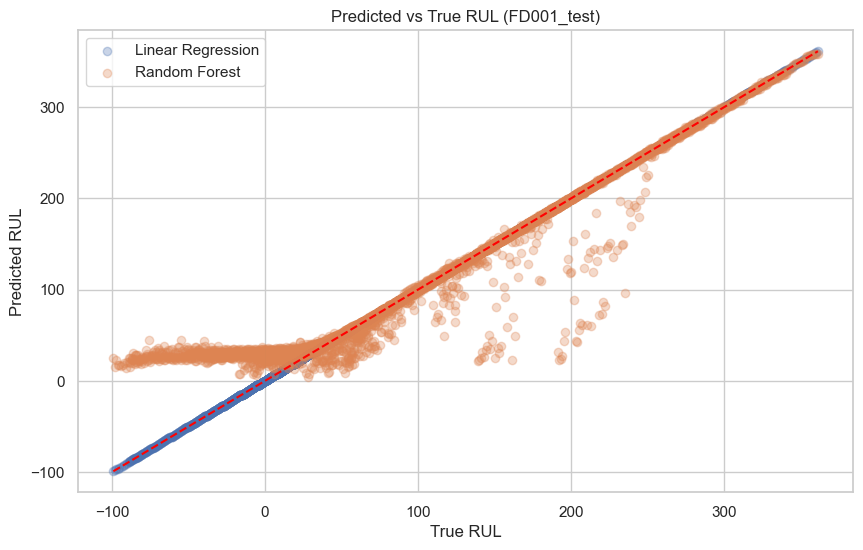

In [102]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_new, y_test_pred_lr_new, alpha=0.3, label="Linear Regression")
plt.scatter(y_test_new, y_test_pred_rfr_new, alpha=0.3, label="Random Forest")
plt.plot([y_test_new.min(), y_test_new.max()],
         [y_test_new.min(), y_test_new.max()],
         color="red", linestyle="--")
plt.xlabel("True RUL")
plt.ylabel("Predicted RUL")
plt.title("Predicted vs True RUL (FD001_test)")
plt.legend()
plt.grid(True)
plt.show()

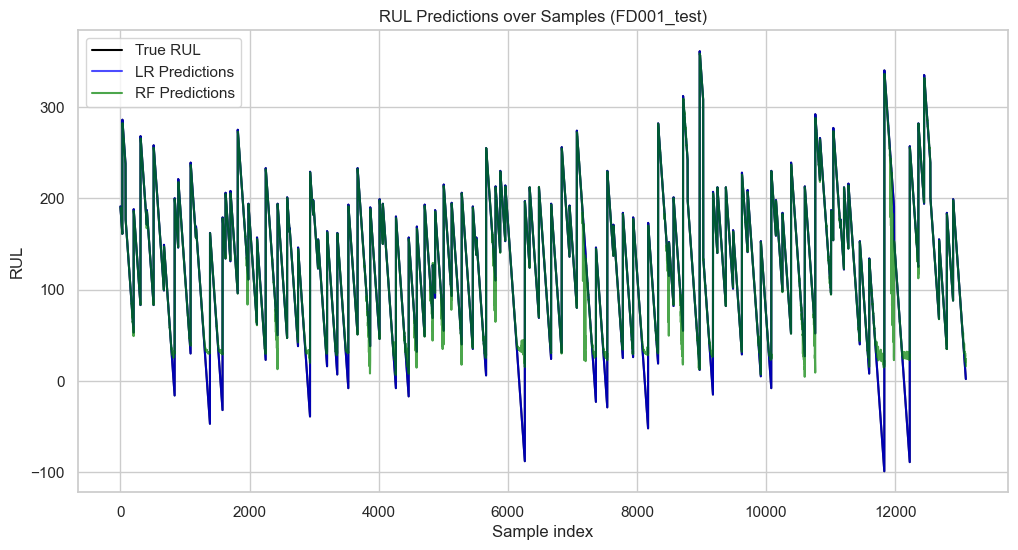

In [103]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_new.values, label="True RUL", color="black")
plt.plot(y_test_pred_lr_new, label="LR Predictions", color="blue", alpha=0.7)
plt.plot(y_test_pred_rfr_new, label="RF Predictions", color="green", alpha=0.7)
plt.xlabel("Sample index")
plt.ylabel("RUL")
plt.title("RUL Predictions over Samples (FD001_test)")
plt.legend()
plt.grid(True)
plt.show()

# **EXPLANATION**

---

- **Model Performance**:
  - Linear Regression (LR) achieves perfect scores (MAE=0, R²=1.0) on both train and test sets — **highly suspicious**, suggests data leakage or trivial prediction (when predicting `RUL = max_cycle - cycle` directly).
  - Random Forest (RF) shows realistic performance: high R² (~0.95–0.998), small errors on train, larger but reasonable errors on test — indicates generalization.

- **Scatter Plot (`Predicted vs True RUL`)**:
  - LR predictions lie exactly on the diagonal (perfect fit), reinforcing suspicion of leakage.
  - RF predictions show a clear positive trend but with spread around the line — typical for real-world regression.

- **Line Plot (`RUL Predictions over Samples`)**:
  - True RUL (black) decreases stepwise per engine unit.
  - LR (blue) tracks true RUL perfectly — confirms it’s likely using target-derived features.
  - RF (green) follows the trend but with noise/overshoots — captures patterns without overfitting to exact values.

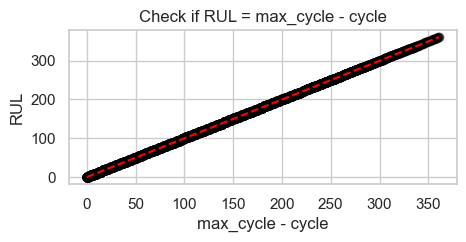

True

In [104]:
FD001_df["max_cycle"] = FD001_df.groupby("unit")["cycle"].transform("max")
FD001_df["RUL_check"] = FD001_df["max_cycle"] - FD001_df["cycle"]

plt.figure(figsize=(5, 2))
plt.scatter(FD001_df["RUL_check"], FD001_df["RUL"], alpha=0.5, color="black")
plt.plot([0, FD001_df["RUL"].max()], [0, FD001_df["RUL"].max()], color="red", linestyle="--")
plt.xlabel("max_cycle - cycle")
plt.ylabel("RUL")
plt.title("Check if RUL = max_cycle - cycle")
plt.grid(True)
plt.show()

all_equal = (FD001_df["RUL_check"] == FD001_df["RUL"]).all()
all_equal


# **SOLVING DATA LEAKAGE**

---

In [105]:
# Reloading data
FD001_df=   pd.read_csv(fd001_path)
FD001_test= pd.read_csv(fd001_test_path)

In [106]:
# Separing RUL from X
X= FD001_df.drop(["RUL", "max_cycle"], axis=1)
y= FD001_df["RUL"]

In [107]:
# Separating the X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [108]:
X_train.head(3)

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_measure_1,sensor_measure_2,sensor_measure_3,sensor_measure_4,sensor_measure_5,sensor_measure_6,sensor_measure_7,sensor_measure_8,sensor_measure_9,sensor_measure_10,sensor_measure_11,sensor_measure_12,sensor_measure_13,sensor_measure_14,sensor_measure_15,sensor_measure_16,sensor_measure_17,sensor_measure_18,sensor_measure_19,sensor_measure_20,sensor_measure_21
2578,13,33,-0.0000,0.0002,100.0,518.67,642.48,1588.69,1406.37,14.62,21.61,552.64,2388.10,9057.65,1.3,47.49,521.57,2388.11,8139.33,8.4294,0.03,394,2388,100.0,38.82,23.3490
15591,78,69,0.0021,-0.0002,100.0,518.67,641.81,1586.41,1389.95,14.62,21.61,554.23,2387.98,9051.31,1.3,47.24,522.32,2388.03,8140.60,8.3898,0.03,392,2388,100.0,39.19,23.4704
2674,13,129,0.0021,0.0004,100.0,518.67,642.59,1595.24,1413.21,14.62,21.61,552.66,2388.08,9085.59,1.3,47.82,520.71,2388.10,8158.22,8.4563,0.03,393,2388,100.0,38.70,23.2775


In [109]:
# Fitting the new models
lr_model, rfr_model= LinearRegression(), RandomForestRegressor()

lr_model.fit(X_train, y_train)
rfr_model.fit(X_train, y_train)
print("")

In [110]:
# Predictions

y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

y_train_pred_rfr = rfr_model.predict(X_train)
y_test_pred_rfr = rfr_model.predict(X_test)

In [111]:
# Model evaluation
lr_model_evals= eval_model("Linear Regression", y_train, y_train_pred_lr, y_test, y_test_pred_lr)
rfr_model_evals= eval_model("Random Forest Regressor", y_train, y_train_pred_rfr, y_test, y_test_pred_rfr)

Linear Regression metrics:
  Train - MAE: 30.376, RMSE: 39.506, R²: 0.669
  Test  - MAE: 30.722, RMSE: 39.904, R²: 0.673
Random Forest Regressor metrics:
  Train - MAE: 4.300, RMSE: 6.230, R²: 0.992
  Test  - MAE: 11.365, RMSE: 16.221, R²: 0.946


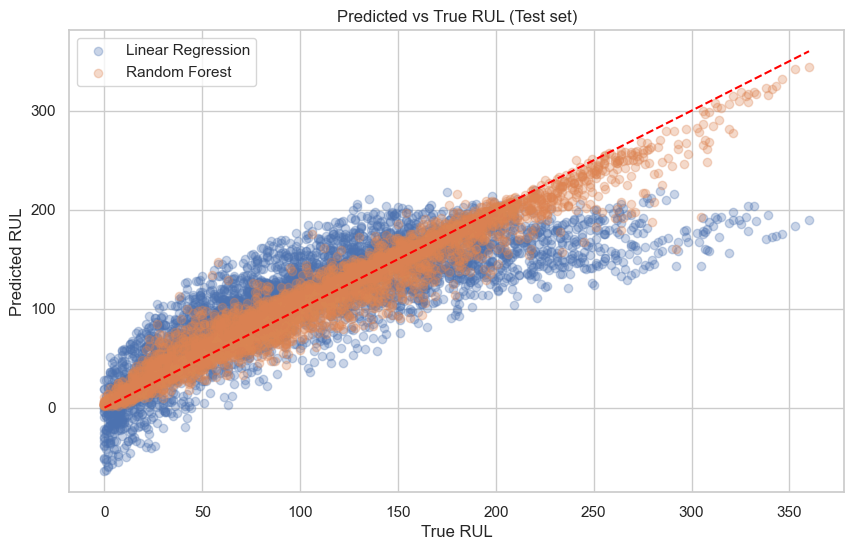

In [112]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_lr, alpha=0.3, label="Linear Regression")
plt.scatter(y_test, y_test_pred_rfr, alpha=0.3, label="Random Forest")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--")
plt.xlabel("True RUL")
plt.ylabel("Predicted RUL")
plt.title("Predicted vs True RUL (Test set)")
plt.legend()
plt.grid(True)
plt.show()


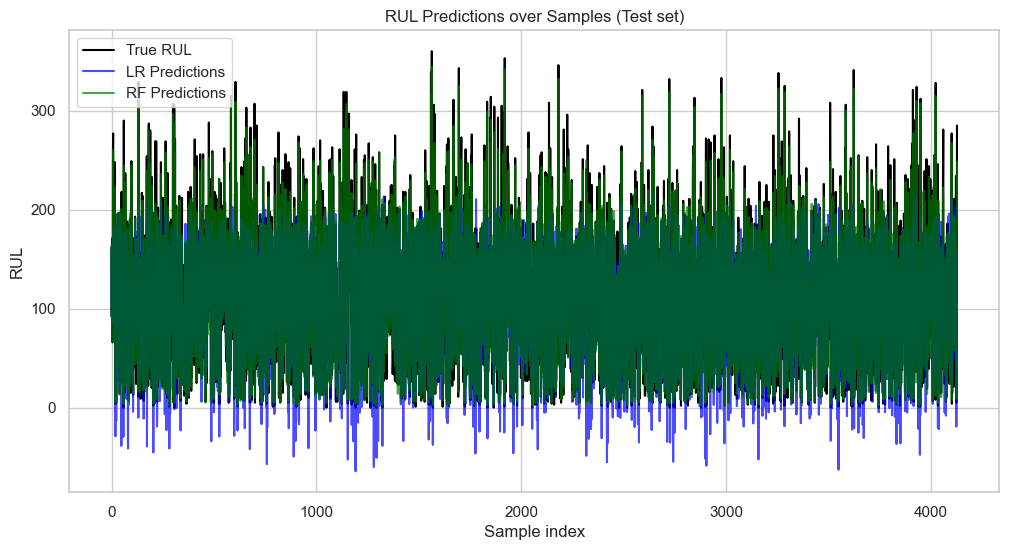

In [113]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="True RUL", color="black")
plt.plot(y_test_pred_lr, label="LR Predictions", color="blue", alpha=0.7)
plt.plot(y_test_pred_rfr, label="RF Predictions", color="green", alpha=0.7)
plt.xlabel("Sample index")
plt.ylabel("RUL")
plt.title("RUL Predictions over Samples (Test set)")
plt.legend()
plt.grid(True)
plt.show()


**Predicted vs True RUL (test set):** Ideally, most predictions (the points on the plot) should fall along the trend line, represented by the red line at the center. This would indicate accurate predictions and that the model is performing correctly. In this case, the Random Forest model predicts most values with good accuracy, as the majority of points are centered around the trend line with very little dispersion. In contrast, Linear Regression exhibits much higher dispersion compared to Random Forest.

**RUL Predictions over Samples (test set):** This plot illustrates how the predictions behave over time (the sample index of the test set). The first thing to note is the stepwise trend of the RUL (black line), which starts at high values (as expected) and gradually decreases to zero, representing the end of the engine’s useful life. This behavior is expected, as the RUL begins at a high value and diminishes cycle by cycle. In this plot, Random Forest (green line) closely reproduces the engine’s life trajectory by following the stepwise trend of the black line. Conversely, Linear Regression (blue line) tends to underestimate RUL at high values and overestimate it at low values, demonstrating its inability to effectively model the non-linear degradation of the engine.

# **PROBLEM STATEMENT**

---

Is this really a regression problem? Or we want to classify the output into failulre or not failure?

In order to answer this, we neet to clarify this problem as: We want to know how many cycles will last the engine before failing or we want to predict the remaining useful life (RUL) of the engine? This is our regressino problem, but if we think on a real life problem we actually want to know if the engine will fail or not within a given period of time, such a X days before the failure —this is our classification problem.

So, we are gonna treat them as regression problems in this dataset.

## Deleting Constant Features:

In [114]:
# Seeking correlations
corr_FD001= FD001_df.corr()
rul_corr=   corr_FD001['RUL'].sort_values(ascending= False)
# Comment out the next line to print the correlation values
#print(rul_corr)

In [115]:
# Constant features: –we erase 'em bc they're NaN or not useful 

constant_features= ["op_setting_3", "sensor_measure_1", "sensor_measure_5", 
                    "sensor_measure_10", "sensor_measure_16", "sensor_measure_18", 
                    "sensor_measure_19"]

In [116]:
# Reasign X and y
X= FD001_df.drop(["RUL", "max_cycle"] + constant_features, axis=1)
y= FD001_df["RUL"]

In [117]:
# Data spliting
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= .2, random_state= 69)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16504, 19) (4127, 19) (16504,) (4127,)


In [118]:
# Creating baseline models
baseline_rfr= RandomForestRegressor(random_state=69)
baseline_xgbr= XGBRegressor(random_state=69)


In [119]:
# Training baseline models
baseline_rfr, baseline_rfr_y_train_pred, baseline_rfr_y_test_pred= train_model(baseline_rfr, X_train, y_train, X_test, y_test)
baseline_xgbr, baseline_xgbr_y_train_pred, baseline_xgbr_y_test_pred= train_model(baseline_xgbr, X_train, y_train, X_test, y_test)
print("Models Trained")

Models Trained


In [120]:
eval_model("baseline_rfr", y_train, baseline_rfr_y_train_pred, y_test, baseline_rfr_y_test_pred)
eval_model("baseline_xgbr", y_train, baseline_xgbr_y_train_pred, y_test, baseline_xgbr_y_test_pred)

baseline_rfr metrics:
  Train - MAE: 4.364, RMSE: 6.319, R²: 0.992
  Test  - MAE: 11.464, RMSE: 16.444, R²: 0.944
baseline_xgbr metrics:
  Train - MAE: 4.413, RMSE: 5.965, R²: 0.992
  Test  - MAE: 7.640, RMSE: 10.623, R²: 0.977


In [121]:
X_train.head(3)

,unit,cycle,op_setting_1,op_setting_2,sensor_measure_2,sensor_measure_3,sensor_measure_4,sensor_measure_6,sensor_measure_7,sensor_measure_8,sensor_measure_9,sensor_measure_11,sensor_measure_12,sensor_measure_13,sensor_measure_14,sensor_measure_15,sensor_measure_17,sensor_measure_20,sensor_measure_21
2578,13,33,-0.0000,0.0002,642.48,1588.69,1406.37,21.61,552.64,2388.10,9057.65,47.49,521.57,2388.11,8139.33,8.4294,394,38.82,23.3490
15591,78,69,0.0021,-0.0002,641.81,1586.41,1389.95,21.61,554.23,2387.98,9051.31,47.24,522.32,2388.03,8140.60,8.3898,392,39.19,23.4704
2674,13,129,0.0021,0.0004,642.59,1595.24,1413.21,21.61,552.66,2388.08,9085.59,47.82,520.71,2388.10,8158.22,8.4563,393,38.70,23.2775
